In [12]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

#Configure API key
quandl.ApiConfig.api_key = 'kBLN3EkyxehKQc-_QkZJ'

#Federal Reserve Economic Data - Unemployment Rate - White
data = quandl.get('FRED/LNU04000003')

In [13]:
plt.figure(figsize=(15,5), dpi=100)

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [14]:
data.head()

,Value
Date,
1954-01-01,5.3
1954-02-01,5.7
1954-03-01,5.8
1954-04-01,5.7
1954-05-01,5.2


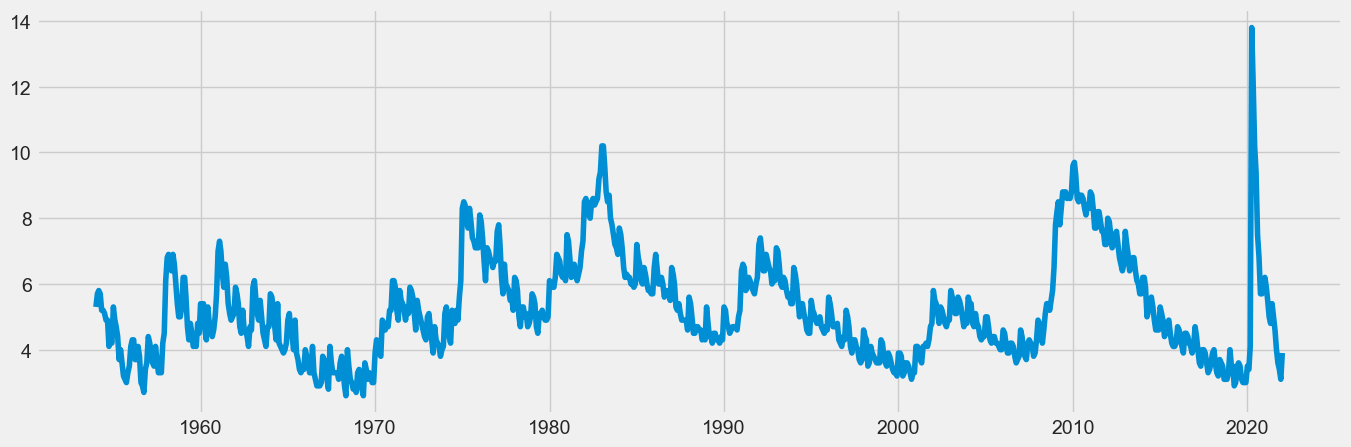

In [25]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

In [16]:
data_2 = data.reset_index()

In [17]:
data_2.head()

,Date,Value
0,1954-01-01,5.3
1,1954-02-01,5.7
2,1954-03-01,5.8
3,1954-04-01,5.7
4,1954-05-01,5.2


In [18]:
data_sub = data_2.loc[(data_2['Date'] >= '1991-01-01') & (data_2['Date'] < '2021-12-31')]

In [19]:
data_sub['datetime'] = pd.to_datetime(data_sub['Date'])
data_sub = data_sub.set_index('datetime')
data_sub.drop(['Date'], axis=1, inplace=True)
data_sub.head()

,Value
datetime,
1991-01-01,6.4
1991-02-01,6.6
1991-03-01,6.5
1991-04-01,5.8
1991-05-01,5.9


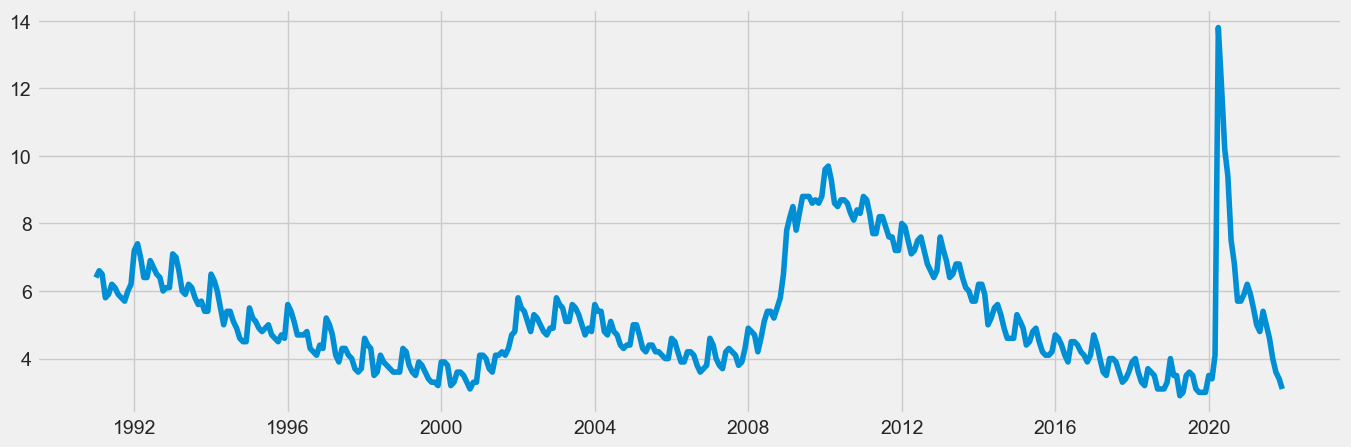

In [27]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [21]:
#Decompose results
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [35]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

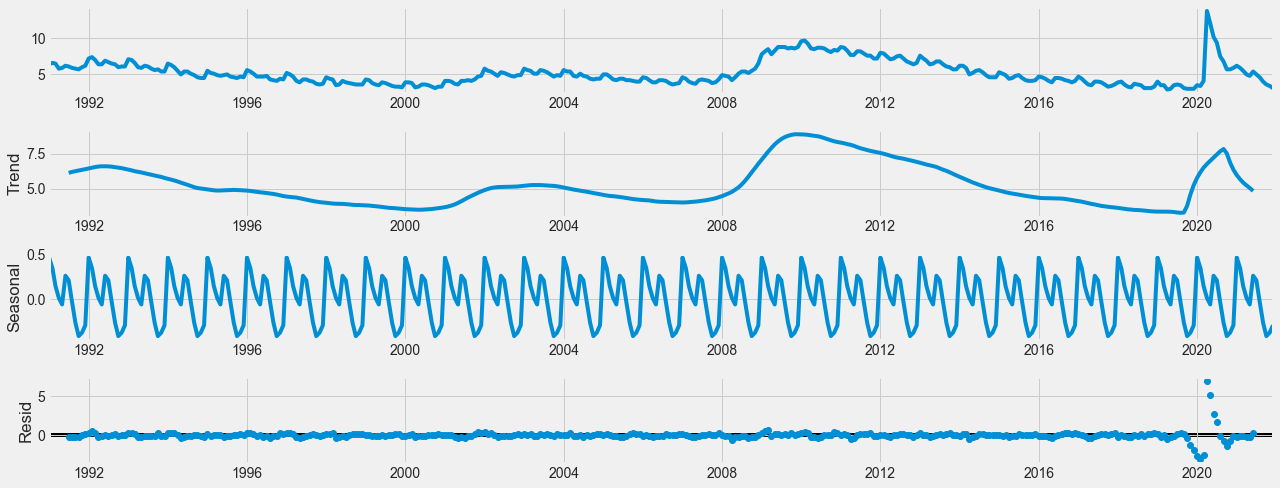

In [36]:
decomposition.plot()
plt.show()

In [37]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.654583
p-value                          0.082232
Number of Lags Used              4.000000
Number of Observations Used    367.000000
Critical Value (1%)             -3.448294
Critical Value (5%)             -2.869448
Critical Value (10%)            -2.570983
dtype: float64


The results indicate that, at a 95% confidence level, the data is non-stationary. The critical value is smaller than the test statistic at this confidence level.

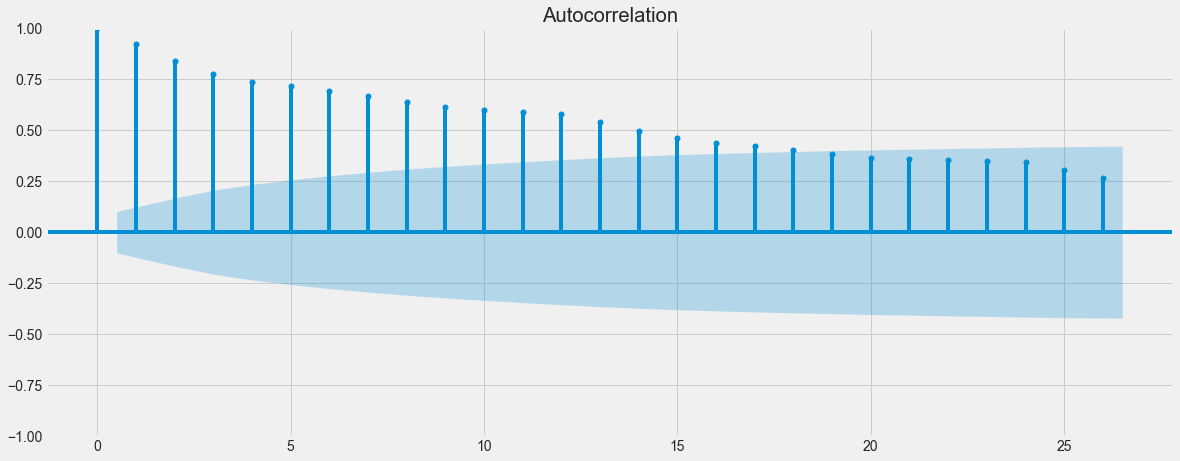

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_sub)
plt.show()

In [45]:
#stationarizing
data_diff = data_sub - data_sub.shift(1)

In [46]:
data_diff.dropna(inplace = True)

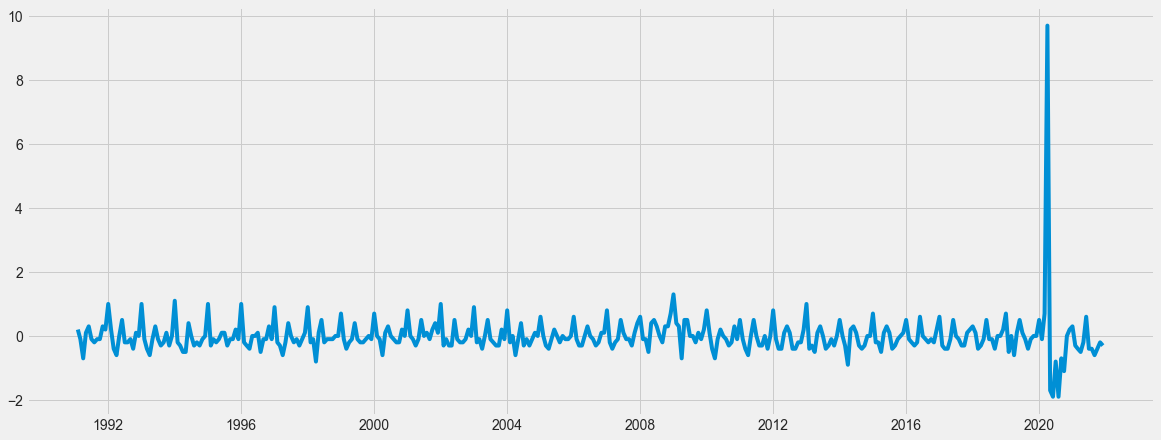

In [47]:
plt.plot(data_diff)

In [48]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.278018e+01
p-value                        7.444624e-24
Number of Lags Used            3.000000e+00
Number of Observations Used    3.670000e+02
Critical Value (1%)           -3.448294e+00
Critical Value (5%)           -2.869448e+00
Critical Value (10%)          -2.570983e+00
dtype: float64


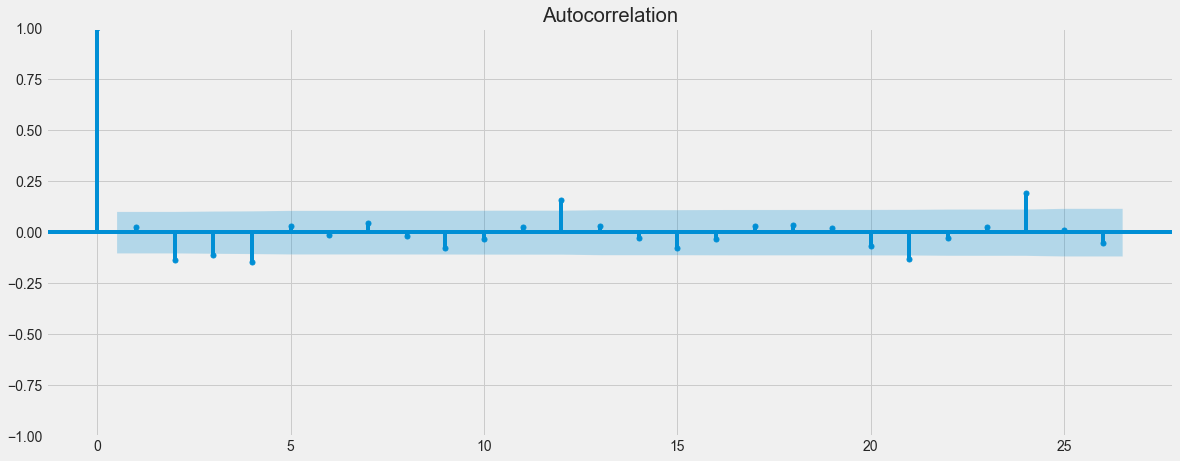

In [44]:
plot_acf(data_diff)
plt.show()